# Prophet can only make univariate forecasts

In [1]:
import pandas as pd

url = 'https://raw.githubusercontent.com/kboroz/TimeSeriesPrediction/refs/heads/main/Data/air_reserve.csv'

y = pd.read_csv(url)
y = y.pivot(index='visit_date', columns='air_store_id')['visitors']
y = y.fillna(0)
y = pd.DataFrame(y.sum(axis=1))

In [2]:

#Preparing the modeling data frame

y = y.reset_index(drop=False)
y.columns = ['ds', 'y']



In [8]:
#Creating a train-test split

train = y.iloc[:450,:]
test = y.iloc[450:,:]



In [6]:
!pip install prophet

In [9]:
#Creating a basic Prophet model

from prophet import Prophet
m = Prophet()
m.fit(train)



INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp42mk1uwo/c227unqt.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp42mk1uwo/z6i0nlas.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=29211', 'data', 'file=/tmp/tmp42mk1uwo/c227unqt.json', 'init=/tmp/tmp42mk1uwo/z6i0nlas.json', 'output', 'file=/tmp/tmp42mk1uwo/prophet_model1nuwmcl5/prophet_model-20240601054947.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
05:49:47 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
05:49:47 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [10]:
#Creating a basic Prophet model

future = m.make_future_dataframe(periods=len(test))
forecast = m.predict(future)



In [11]:
#Creating a basic Prophet model

from sklearn.metrics import r2_score
print(r2_score(list(test['y']), list(forecast.loc[450:,'yhat'] )))



0.8099096435704054


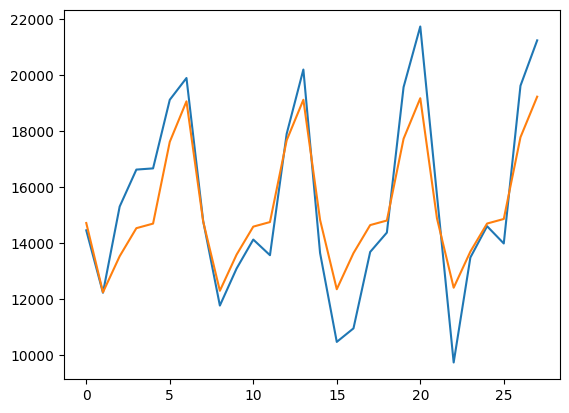

In [12]:
#Plotting the fit of the model

import matplotlib.pyplot as plt
plt.plot(list(test['y']))
plt.plot(list(forecast.loc[450:,'yhat'] ))
plt.show()



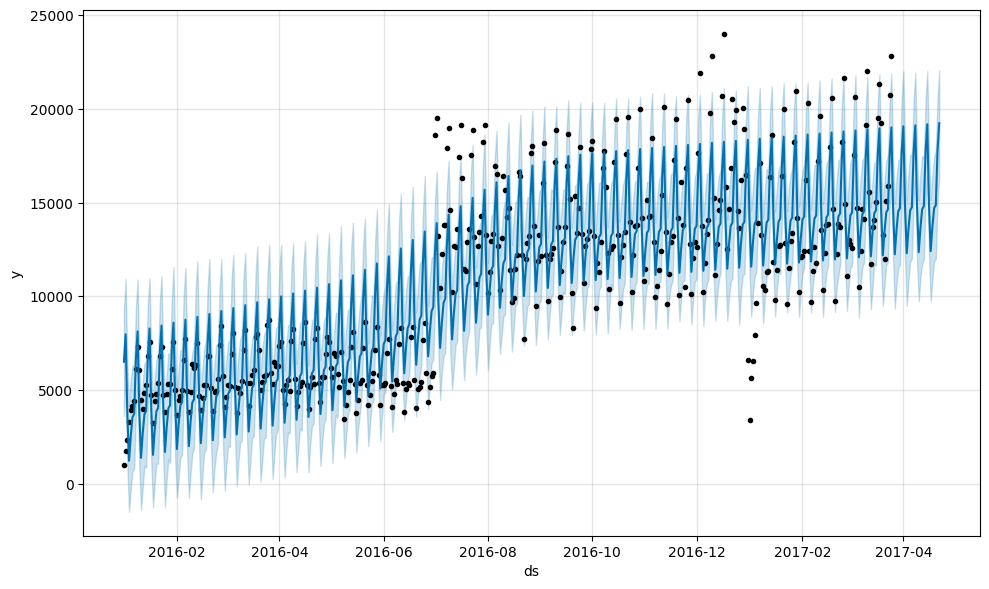

In [13]:
#Creating a Prophet forecast plot

fig1 = m.plot(forecast)
plt.show()



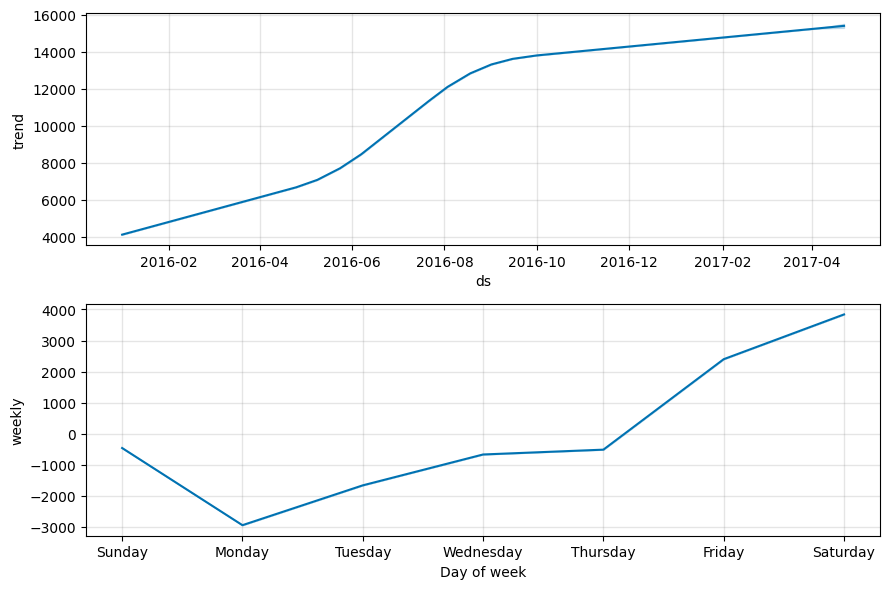

In [14]:
#Creating a Prophet decomposition plot

fig2 = m.plot_components(forecast)
plt.show()



INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp42mk1uwo/hlg4ytuj.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp42mk1uwo/slv0yafq.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=92010', 'data', 'file=/tmp/tmp42mk1uwo/hlg4ytuj.json', 'init=/tmp/tmp42mk1uwo/slv0yafq.json', 'output', 'file=/tmp/tmp42mk1uwo/prophet_modeldfcpq8z6/prophet_model-20240601055103.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
05:51:03 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
05:51:03 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


0.7879118622201484


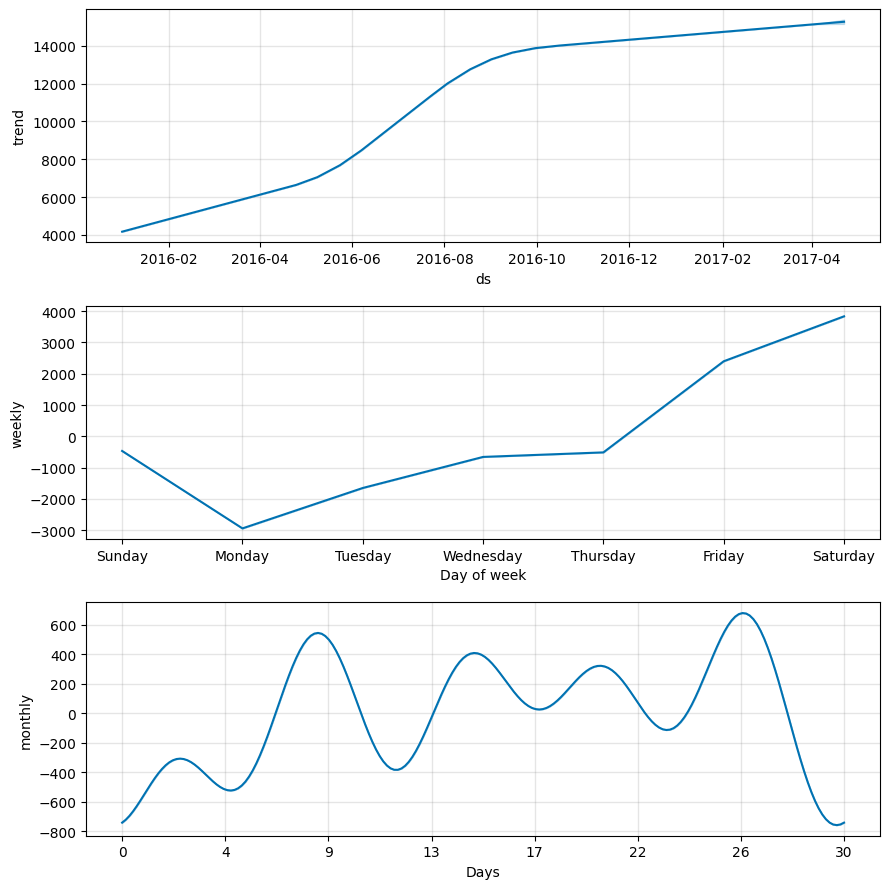

In [15]:
#Add montly seasonality to the plot

m2 = Prophet()
m2.add_seasonality(name='monthly', period=30.5, fourier_order=5)

m2.fit(train)

future2 = m2.make_future_dataframe(periods=len(test))
forecast2 = m2.predict(future)
print(r2_score(list(test['y']), list(forecast2.loc[450:,'yhat'] )))

fig2 = m2.plot_components(forecast2)
plt.show()



In [19]:
#Prepare holidays data

url = 'https://raw.githubusercontent.com/kboroz/TimeSeriesPrediction/refs/heads/main/Data/date_info.csv'

holidays = pd.read_csv(url)
holidays = holidays[holidays['holiday_flg'] == 1]
holidays = holidays[['calendar_date', 'holiday_flg']]
holidays = holidays.drop(['holiday_flg'], axis=1)
holidays['holiday'] = 'holiday'
holidays.columns = ['ds', 'holiday']



INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp42mk1uwo/nn5oa4pq.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp42mk1uwo/ybf6meft.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=27267', 'data', 'file=/tmp/tmp42mk1uwo/nn5oa4pq.json', 'init=/tmp/tmp42mk1uwo/ybf6meft.json', 'output', 'file=/tmp/tmp42mk1uwo/prophet_modelzlpzv8hu/prophet_model-20240601060001.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
06:00:01 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
06:00:01 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


0.8084482761178593


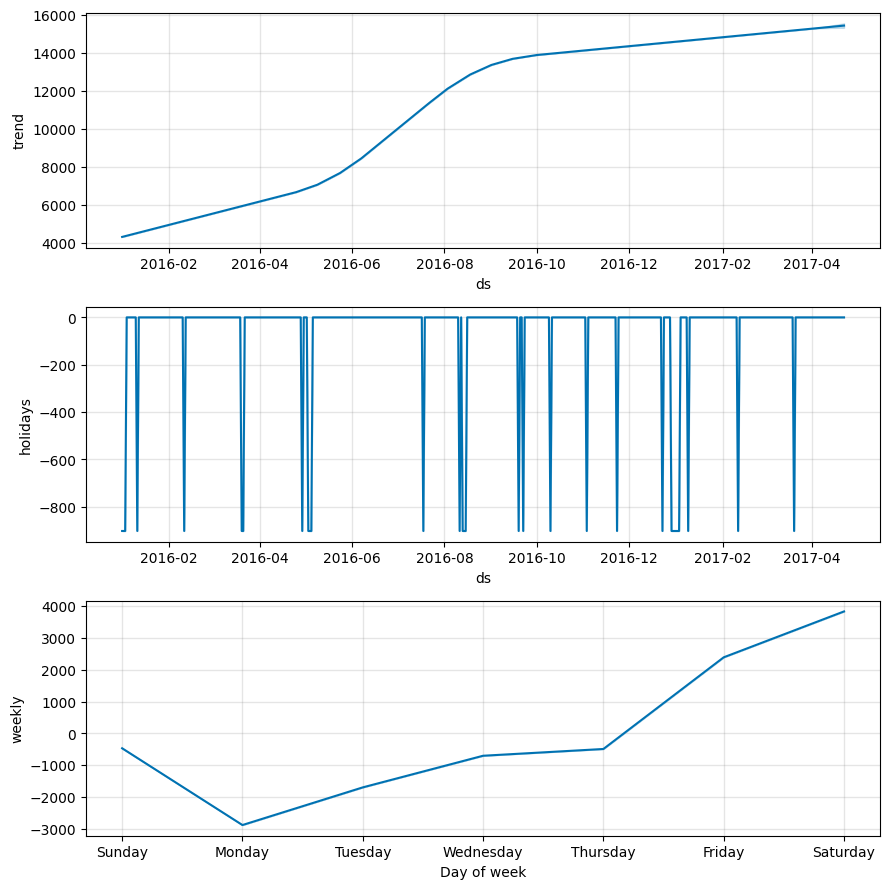

In [20]:
#Add holidays to the model

m3 = Prophet(holidays=holidays)
m3.fit(train)
future3 = m3.make_future_dataframe(periods=len(test))
forecast3 = m3.predict(future)

print(r2_score(list(test['y']), list(forecast3.loc[450:,'yhat'] )))

fig2 = m3.plot_components(forecast3)
plt.show()



In [21]:
#Add reservations to the model

url = 'https://raw.githubusercontent.com/kboroz/TimeSeriesPrediction/refs/heads/main/Data/air_reserve.csv'

X_reservations = pd.read_csv(url)
X_reservations['visit_date'] = pd.to_datetime(X_reservations['visit_datetime']).dt.date
X_reservations = pd.DataFrame(X_reservations.groupby('visit_date')['reserve_visitors'].sum())
X_reservations = X_reservations.reset_index(drop = False)
train4 = train.copy()
train4['ds'] = pd.to_datetime(train4['ds']).dt.date
train4 = train4.merge(X_reservations, left_on = 'ds', right_on = 'visit_date', how = 'left')[['ds', 'y', 'reserve_visitors']].fillna(0)



INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp42mk1uwo/mbpvn39f.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp42mk1uwo/m2lrwlu1.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=21668', 'data', 'file=/tmp/tmp42mk1uwo/mbpvn39f.json', 'init=/tmp/tmp42mk1uwo/m2lrwlu1.json', 'output', 'file=/tmp/tmp42mk1uwo/prophet_modeljew4u1t_/prophet_model-20240601060126.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
06:01:26 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
06:01:26 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


0.834327868794596


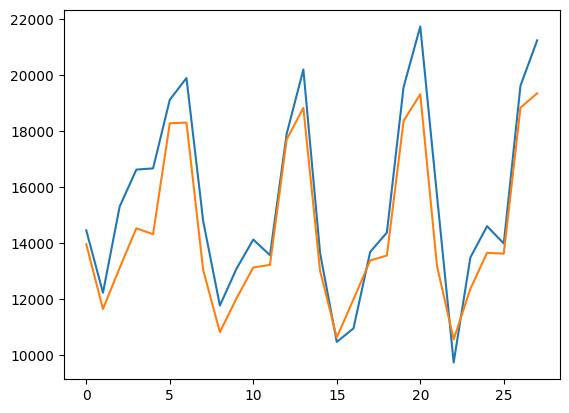

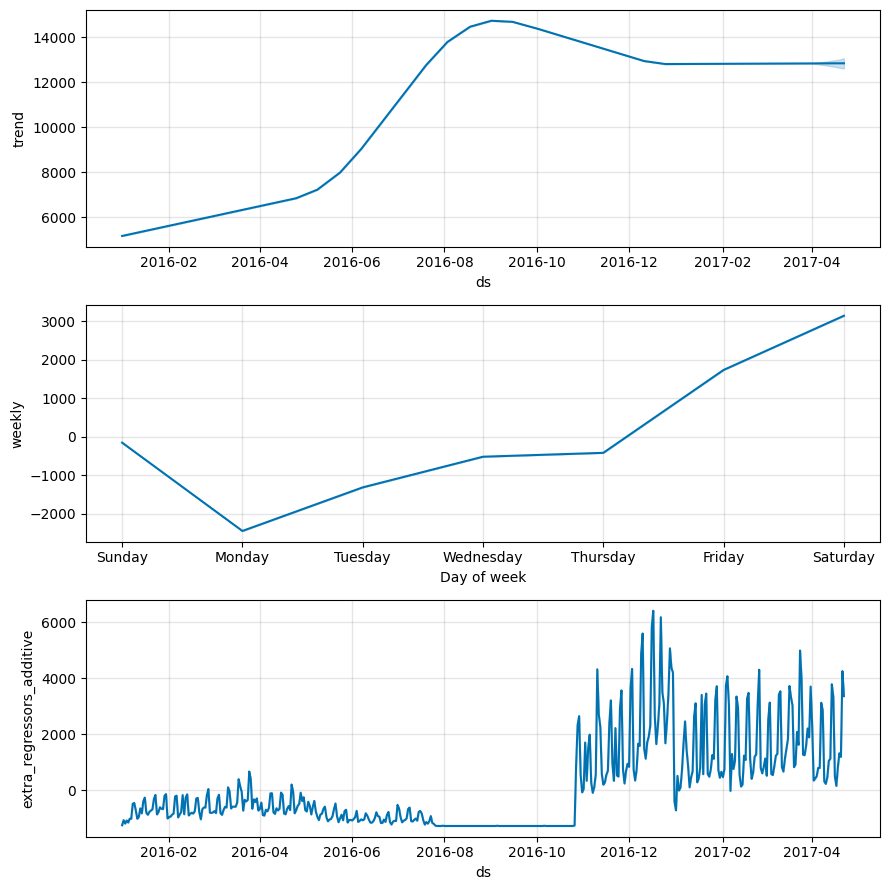

In [23]:
#Add reservations to the model

m4 = Prophet()
m4.add_regressor('reserve_visitors')
m4.fit(train4)
future4 = m4.make_future_dataframe(periods=len(test))
future4['ds'] = pd.to_datetime(future4['ds']).dt.date

future4 = future4.merge(X_reservations, left_on = 'ds', right_on = 'visit_date', how = 'left')[['ds', 'reserve_visitors']].fillna(0)

forecast4 = m4.predict(future4)

print(r2_score(list(test['y']), list(forecast4.loc[450:,'yhat'] )))

plt.plot(list(test['y']))
plt.plot(list(forecast4.loc[450:,'yhat'] ))

fig2 = m4.plot_components(forecast4)
plt.show()

